# サーバの状態の調査

M先輩から「3dwebmapのサーバ、中で何動いてるかレポート作って」と指示があった

Jupyter-LC_wrapper有効化

In [1]:
%env lc_wrapper_force=on

env: lc_wrapper_force=on


# 対象の確認

ansibleのインベントリファイルで対象サーバを確認し、簡単なコマンドが通ることを確認しておく

In [3]:
hosts = !cat ./hosts
hosts

path: /home/jovyan/jtf2018/.log/20180727/20180727-073853-0318.log (1 logs recorded)
start time: 2018-07-27 07:38:53(UTC)
end time: 2018-07-27 07:38:53(UTC)
output size: 569 bytes
0 chunks with matched keywords or errors
----


['jtf2018_3dwebmap_1', 'jtf2018_wiki_1', 'jtf2018_boinc_1']

In [4]:
for h in hosts:
        if h.find('3dwebmap') > -1:
            target = ' -i ./hosts {} -c docker'.format(h)
target

path: /home/jovyan/jtf2018/.log/20180727/20180727-073853-0610.log (1 logs recorded)
start time: 2018-07-27 07:38:53(UTC)
end time: 2018-07-27 07:38:53(UTC)
output size: 659 bytes
0 chunks with matched keywords or errors
----


' -i ./hosts jtf2018_3dwebmap_1 -c docker'

In [5]:
!sudo ansible -a "ls -la" {target}

path: /home/jovyan/jtf2018/.log/20180727/20180727-073853-0773.log (1 logs recorded)
start time: 2018-07-27 07:38:53(UTC)
end time: 2018-07-27 07:38:59(UTC)
output size: 1663 bytes
0 chunks with matched keywords or errors
----
 [WARNING] Ansible is in a world writable directory (/home/jovyan/jtf2018), ignoring it as an ansible.cfg source.
jtf2018_3dwebmap_1 | SUCCESS | rc=0 >>
total 236
drwxr-xr-x   8 node node   4096 Jul 27 06:56 .
drwxr-xr-x   1 root root   4096 Mar 15 18:52 ..
drwxr-xr-x   4 node node   4096 Jul 27 06:56 3dwebclient
-rw-r--r--   1 node node 135373 Mar 15 18:50 CityDBonDocker-big.png
-rw-r--r--   1 node node   1037 Mar 15 18:50 TUM_Logo_blau_rgb_s.svg
drwxr-xr-x   7 node node   4096 Jul 27 06:56 ThirdParty
drwxr-xr-x   2 node node   4096 Mar 15 18:51 data
drwxr-xr-x   5 node node   4096 Jul 27 06:56 examples
-rw-r--r--   1 node node   3400 Mar 15 18:50 index.html
drwxr-xr-x   3 node node   4096 Jul 27 06:56 js
drwxr-xr-x 147 node node   4096 Jul 27 06:56 node_modules


# サーバの基本情報を収集

## OSのバージョン

In [6]:
command = "'cat /etc/issue'"
!sudo ansible -a {command} {target}

path: /home/jovyan/jtf2018/.log/20180727/20180727-074042-0567.log (1 logs recorded)
start time: 2018-07-27 07:40:42(UTC)
end time: 2018-07-27 07:40:50(UTC)
output size: 753 bytes
0 chunks with matched keywords or errors
----
 [WARNING] Ansible is in a world writable directory (/home/jovyan/jtf2018), ignoring it as an ansible.cfg source.
jtf2018_3dwebmap_1 | SUCCESS | rc=0 >>
Debian GNU/Linux 8 \n \l


https://wiki.debian.org/LTS

Debian 8 “Jessie”

## サービス

https://qiita.com/pocket8137/items/9df9ef5ad93e7b220c42

insserv -s でいけそう

In [7]:
command = "'insserv -s'"
!sudo ansible -a {command} {target}

path: /home/jovyan/jtf2018/.log/20180727/20180727-074050-0714.log (1 logs recorded)
start time: 2018-07-27 07:40:50(UTC)
end time: 2018-07-27 07:40:55(UTC)
output size: 1689 bytes
3 chunks with matched keywords or errors
----
 [WARNING] Ansible is in a world writable directory (/home/jovyan/jtf2018), ignoring it as an ansible.cfg source.
jtf2018_3dwebmap_1 | SUCCESS | rc=0 >>
K:05:0:halt
K:03:0 6:umountfs
K:04:0 6:umountroot
K:02:0 6:umountnfs.sh
K:01:0 6:sendsigs
K:01:0 6:hwclock.sh
K:01:0 6:urandom
K:05:6:reboot
S:02:S:udev
S:04:S:hwclock.sh
S:03:S:mountdevsubfs.sh
S:05:S:checkroot.sh
S:10:S:urandom
S:08:S:mountall.sh
S:09:S:mountall-bootclean.sh
S:01:1 2 3 4 5:motd
S:01:S:hostname.sh
S:02:1:single
S:01:1:killprocs
S:01:1 2 3 4 5:bootlogs
S:02:2 3 4 5:rmnologin
S:12:S:mountnfs.sh
S:13:S:mountnfs-bootclean.sh
S:02:2 3 4 5:rc.local
S:01:S:mountkernfs.sh
S:06:S:checkfs.sh
S:07:S:checkroot-bootclean.sh
S:14:S:bootmisc.sh
S:10:S:udev-finish
S:10:S:procps
S:14:S:x11-common


それっぽいサービスはない感じ

## プロセス

In [8]:
command = "'ps aux'"
!sudo ansible -a {command} {target}

path: /home/jovyan/jtf2018/.log/20180727/20180727-074056-0061.log (1 logs recorded)
start time: 2018-07-27 07:40:56(UTC)
end time: 2018-07-27 07:41:01(UTC)
output size: 1696 bytes
0 chunks with matched keywords or errors
----
 [WARNING] Ansible is in a world writable directory (/home/jovyan/jtf2018), ignoring it as an ansible.cfg source.
jtf2018_3dwebmap_1 | SUCCESS | rc=0 >>
USER       PID %CPU %MEM    VSZ   RSS TTY      STAT START   TIME COMMAND
node         1  0.0  0.7 888784 16104 ?        Ssl  06:56   0:00 node server.js --public
node      1008  0.0  0.0   4336   764 ?        Ss   07:41   0:00 /bin/sh -c /bin/sh -c '/usr/bin/python /home/node/.ansible/tmp/ansible-tmp-1532677259.0384507-18808803258855/command.py && sleep 0'
node      1013  0.0  0.0   4336   704 ?        S    07:41   0:00 /bin/sh -c /usr/bin/python /home/node/.ansible/tmp/ansible-tmp-1532677259.0384507-18808803258855/command.py && sleep 0
node      1014  0.0  0.4  31592 10104 ?        S    07:41   0:00 /usr/bin/pyth

node.js 動いてるっぽいな

## LISTENポート

In [16]:
command = "'ss -lnat'"
!sudo ansible -a {command} {target}

path: /home/jovyan/jtf2018/.log/20180727/20180727-081644-0510.log (7 logs recorded)
start time: 2018-07-27 08:16:44(UTC)
end time: 2018-07-27 08:16:49(UTC)
output size: 893 bytes
0 chunks with matched keywords or errors
----
 [WARNING] Ansible is in a world writable directory (/home/jovyan/jtf2018), ignoring it as an ansible.cfg source.
jtf2018_3dwebmap_1 | SUCCESS | rc=0 >>
State      Recv-Q Send-Q        Local Address:Port          Peer Address:Port 
LISTEN     0      128                      :::8000                    :::*     


In [10]:
command = "'ss -lnau'"
!sudo ansible -a {command} {target}

path: /home/jovyan/jtf2018/.log/20180727/20180727-074107-0968.log (1 logs recorded)
start time: 2018-07-27 07:41:07(UTC)
end time: 2018-07-27 07:41:12(UTC)
output size: 801 bytes
0 chunks with matched keywords or errors
----
 [WARNING] Ansible is in a world writable directory (/home/jovyan/jtf2018), ignoring it as an ansible.cfg source.
jtf2018_3dwebmap_1 | SUCCESS | rc=0 >>
State      Recv-Q Send-Q        Local Address:Port          Peer Address:Port 


8000番ポートがLISTENしてる

# サービスの確認

8000番ポートにブラウザでアクセスしてみる

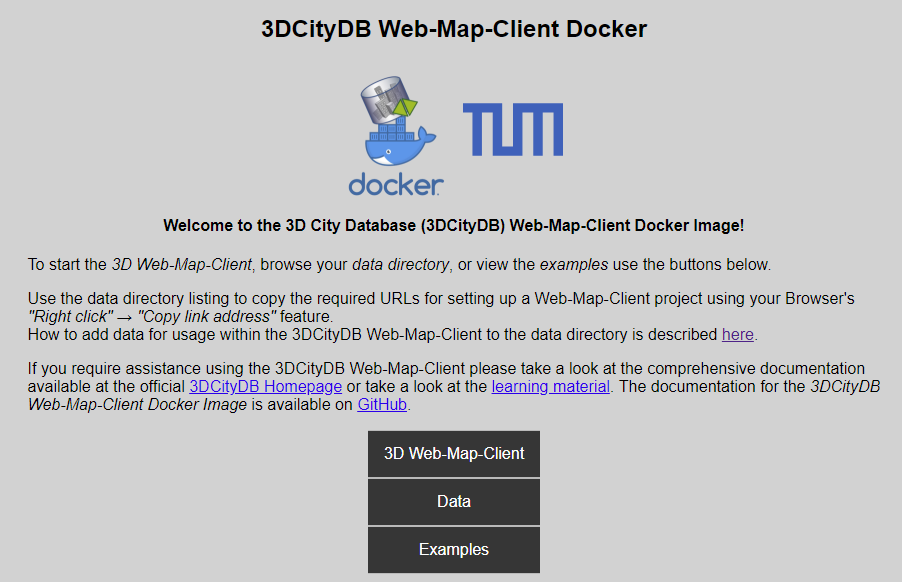

地図が見れるwebアプリだった

# まとめ

node.jsで8000番ポートからサービスされてるwebアプリ「3D City Database Web Map Client」が動いている